# My Project:
#**Sentiment Analysis of Product Reviews using Naive Bayes**

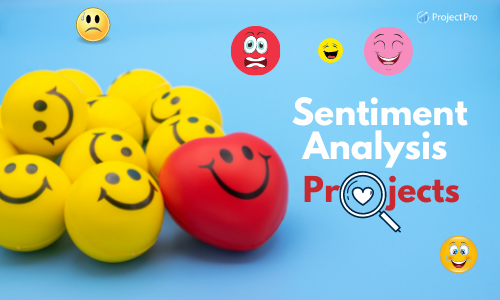

# Objective :
#The goal of this project is to classify product reviews as positive or negative using the Naive Bayes algorithm.
#This involves text preprocessing, training a machine learning model, and evaluating its performance.
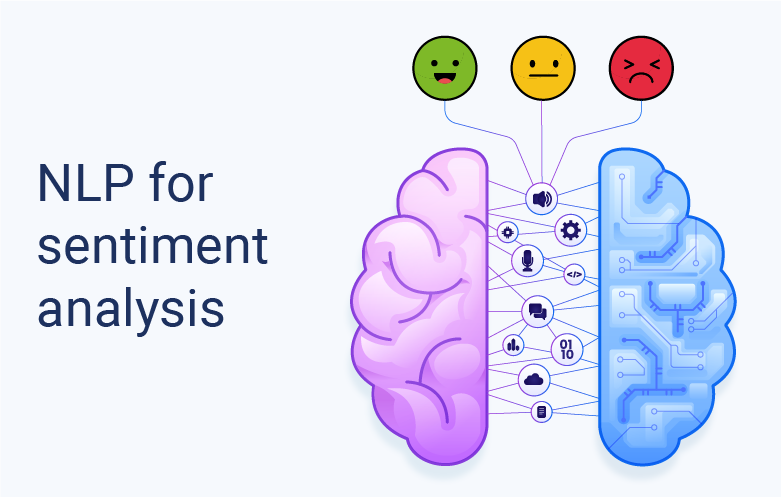

In [1]:
#Uploading the downloaded file (taken from kaggle) by extracting the zip file
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [2]:
# Dataset
#The dataset is a CSV file containing product reviews and their associated sentiments (positive/negative).

In [3]:
#for balancing the data as it contain more positive review and less negative reviews
#pandas for data loading
#Converting scores to sentiment by creating function
import pandas as pd
#Loading the file
df = pd.read_csv("Reviews.csv")

In [4]:
#priniting the data including sentiments
print(df['Sentiment'].value_counts())

Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64


In [6]:
#for checking the name of columns in dataset
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Sentiment'],
      dtype='object')


In [7]:
#making the reviews in small letter for better readability of data to the machine
df['Text'] = df['Text'].str.lower()

In [8]:
#cleaning the review by removing special character for easy data reading to machine model
#re for regular expression and lambda is an anonymous function
import re
df['Text'] = df['Text'].astype(str).apply(lambda x: re.sub(r'[^a-z\s]', '', x.lower()))

In [9]:
#removing stopwords for more readable code to the machine
#nltk stands for natural language toolkit, provides various tools for machine learning like tokenization
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
#reading the first 5 reviews
df['Text'].head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around centuries light pillowy citr...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...


In [11]:
#vectorizing for converting data into number for creating matrix to represent data in graph
from sklearn.feature_extraction.text import CountVectorizer
# Creating vectorizer
vectorizer = CountVectorizer(stop_words='english')
# Fit and transforming the cleaned text column
X = vectorizer.fit_transform(df['Text'])
# Check shape of the matrix
print("Feature matrix shape:", X.shape)

Feature matrix shape: (568454, 223834)


In [12]:
# Convert scores to positive/negative
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else 'negative')
# Then train your model on:
y = df['Sentiment']

In [13]:
# converting scores to sentiment by using function
def convert_score_to_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'
# creating a new column
df['Sentiment'] = df['Score'].apply(convert_score_to_sentiment)
# Checking the distribution of sentiments
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,443777
Negative,82037
Neutral,42640


In [14]:
# Now we will set y to the new column i.e. sentiment
y = df['Sentiment']

In [15]:
#Training our model for accuracy and precision
from sklearn.model_selection import train_test_split
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#using naive bayes to fit tha data
#MultinomialNB for text classification in data
from sklearn.naive_bayes import MultinomialNB #ML algorithm
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [17]:
#testing the accuracy and precision of model
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
# Testing Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Testing precision
print(classification_report(y_test, y_pred))

Accuracy: 0.8438662690978178
              precision    recall  f1-score   support

    Negative       0.67      0.64      0.66     16181
     Neutral       0.40      0.25      0.31      8485
    Positive       0.90      0.94      0.92     89025

    accuracy                           0.84    113691
   macro avg       0.66      0.61      0.63    113691
weighted avg       0.83      0.84      0.83    113691



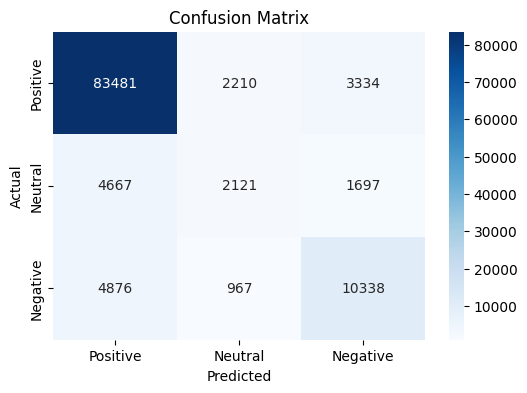

In [18]:
#plotting confusion matrix for easily representation of dataset
from sklearn.metrics import confusion_matrix # ML algorithm
import seaborn as sns
import matplotlib.pyplot as plt
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])
# Plotting
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

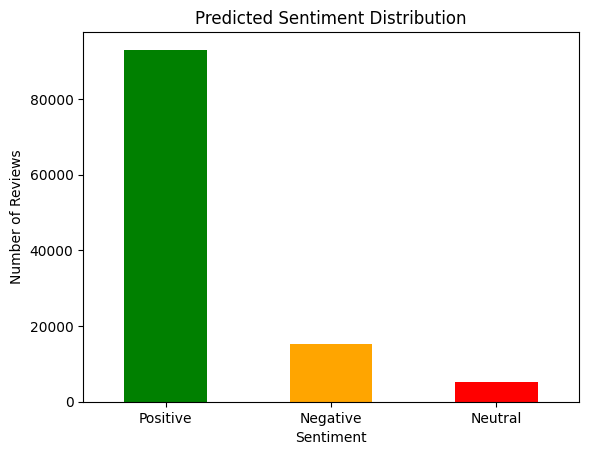

In [19]:
#making graph for presentation of reviews in dataset
import pandas as pd  # Importing pandas for data handling
#Creating DataFrame from predictions
predicted_counts = pd.Series(y_pred).value_counts()
#Plotting
predicted_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

# **Conclusion**

#Sentiment analysis using the Naive Bayes algorithm effectively classifies product reviews into positive, negative, or neutral sentiments, achieving high accuracy in many cases. This method is efficient and relatively simple to implement, making it a popular choice for analyzing customer opinions expressed in product reviews. The algorithm works by calculating the probability of a review belonging to a specific sentiment class based on the words present in the review.

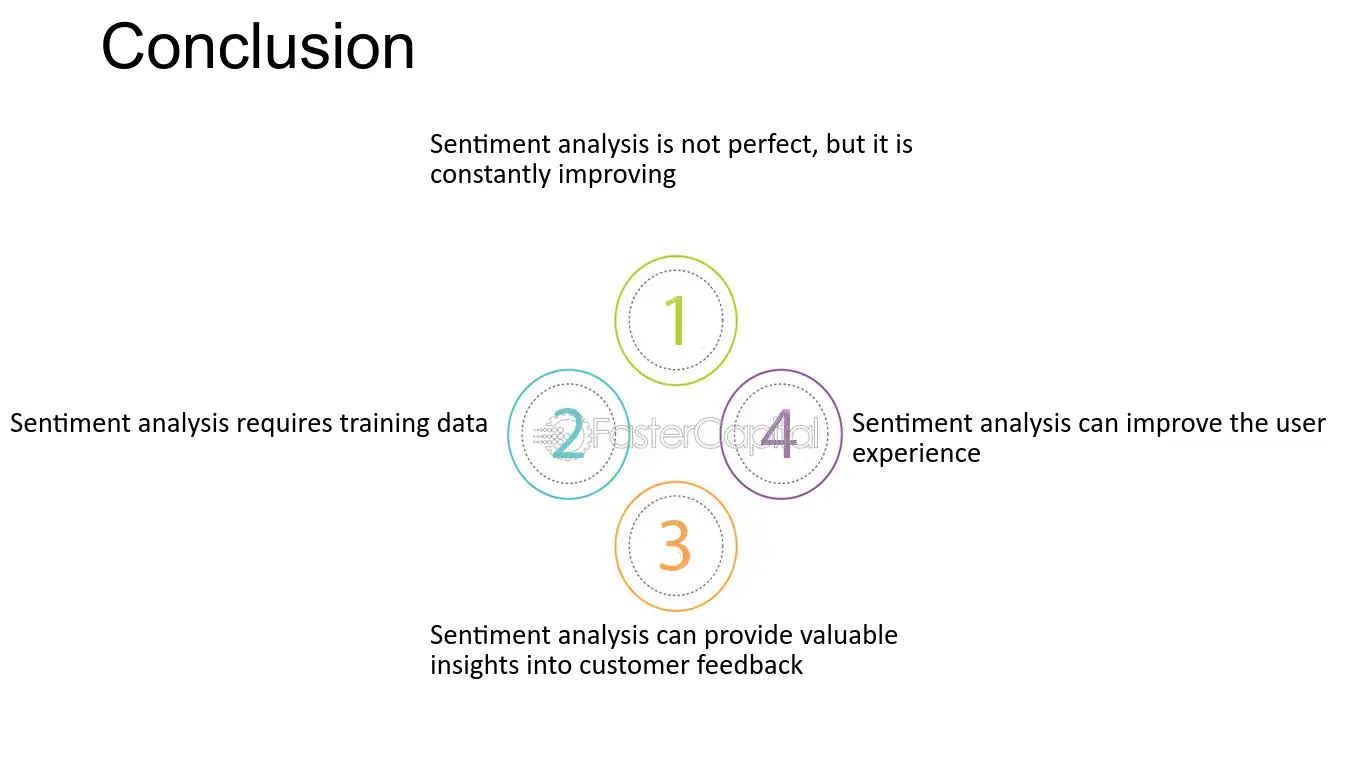

# **Thank you**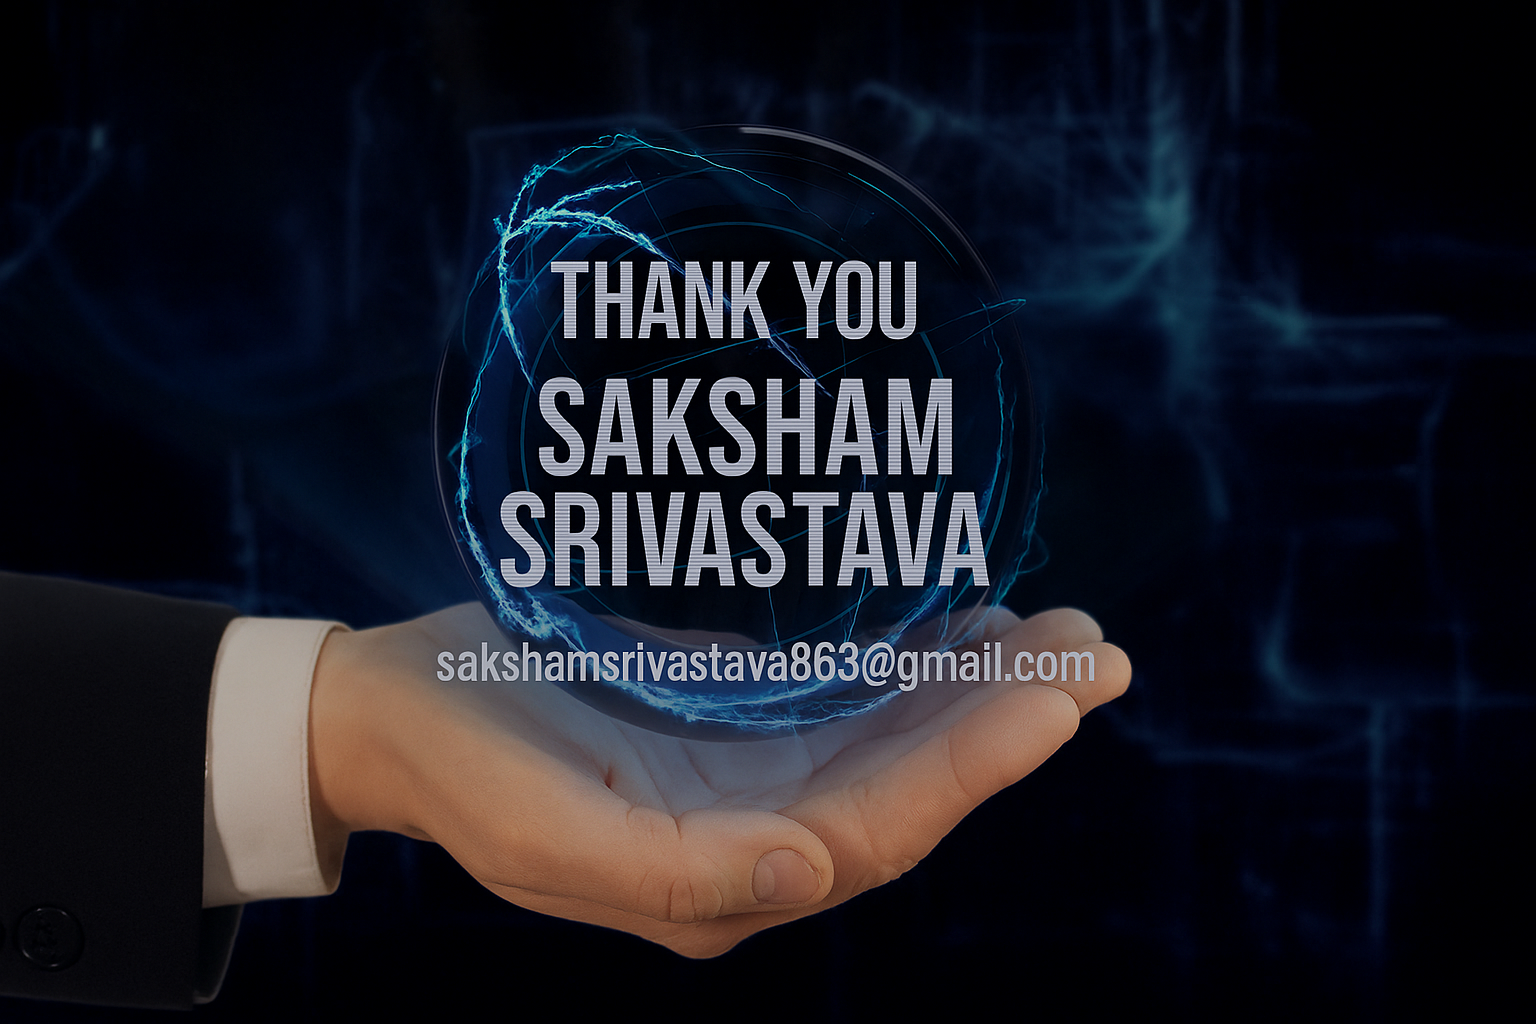